# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Create two new dataframes
north_df = pd.read_csv("C:/Users/priya/OneDrive/Desktop/women+/call-center-cleanup-assignment/NorthCallCenter.csv")
south_df = pd.read_csv("C:/Users/priya/OneDrive/Desktop/women+/call-center-cleanup-assignment/SouthCallCenter.csv")

In [2]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [32]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [33]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
north_df.value_counts("Rep ID")

Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
south_df.value_counts("Rep ID")

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:
north_df[["Busy Minutes", "Incoming Wait Time", "Not Ready Minutes", "During Call Wait Time"]].mean()


Busy Minutes             9.987755
Incoming Wait Time       3.048780
Not Ready Minutes        1.914286
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
avg_cols = ["Busy Minutes", "Incoming Wait Time","Not Ready Minutes", "During Call Wait Time"]
south_df[avg_cols].mean()

Busy Minutes             10.054140
Incoming Wait Time        3.000000
Not Ready Minutes         1.910828
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# Code Used:
south_df["Time Block"].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [9]:
north_df["Time Block"].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9 Reps at the North branch
- 1b) Reps in the South Branch = 11 Reps at the South branch


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05 
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes =1.91 
> - Incoming Wait Time =3.00
> - During Call Wait Time =  3.08
- 3) Total Calls taken for all branches per time block:
9:00AM = 10
10:00AM = 99
11:00AM = 56
12:00PM = 120
1:00PM = 40
2:00PM = 65
3:00PM = 73
4:00PM = 53
5:00PM = 43




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes there are null values in "Incoming Wait Time" column. The null values are filled with mean waiting time.

In [46]:
# Code Used
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))
# Add Additional Cells as needed.


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 0%
During Call Wait Time - 0%
Calls - 0%


In [41]:
med = north_df['Incoming Wait Time'].median()
print(med)
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(med)
north_df['Incoming Wait Time'] 

3.0


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
240    3.0
241    3.0
242    3.0
243    3.0
244    3.0
Name: Incoming Wait Time, Length: 245, dtype: float64

In [44]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 0%
During Call Wait Time - 0%
Calls - 0%


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I couldn't see two different YES in the column 'sale'. Anyways this column is not used for analysis so dropped the same.

In [11]:
ndf = north_df.drop(['Lost Call', 'Sale', 'Unnamed: 0'], axis=1)
ndf.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,8,2,1.0,4,1


In [12]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: #Yes there are duplicate values in the rows for each column but they are needed and make sense. So not dropping any duplicate values for this analysis.

In [51]:
#Code Used
north_df[north_df.duplicated()]
south_df[south_df.duplicated()]
# Add Additional Cells as needed.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Yes the 'sale', 'Lost call' , 'Unnamed' columns doesn't provide any values to the analysis. So dropped them.

In [14]:
#Code Used
sdf = south_df.drop(['Lost Call', 'Sale', 'Unnamed: 0'], axis=1)
sdf.head()
# Add Additional Cells as needed.

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [15]:
# Create dataframe for the entire company named df
df = pd.merge(ndf, sdf, how='outer')
df


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent had the highest calls in the North Branch 
- South Branch = Eric had the highest in the South branch 


In [52]:
# Code Used
# Add Additional Cells as needed.

#North Branch
ndf.groupby('Rep ID').Calls.sum().sort_values(ascending=False)

Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Calls, dtype: int64

In [54]:
#South Branch
sdf.groupby('Rep ID').Calls.sum().sort_values(ascending=False)

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Calls, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = For the North branch it was 1.25%
- South Branch = For South it was .72%.
- Company Wide = For the North branch it was 1.25% and for South it was .72%.
- Do any of these fall out of the optimal range of 2-5%?No

In [76]:
# Code Used
# Add Additional Cells as needed.
df.value_counts('Abandoned')

Abandoned
0    548
1     11
dtype: int64

In [77]:
column_name = 'Abandoned'
totalabandonedcalls = df['Abandoned'].value_counts().sum()
totalabandonedcalls

559

In [78]:
abandonedcalls = df.Abandoned.value_counts()[1]
abandonedcalls

11

In [79]:
Coabandoned = abandonedcalls / totalabandonedcalls.sum() * 100
Coabandoned

1.9677996422182469

In [80]:
df.groupby('Branch').Abandoned.sum().sort_values(ascending=False)

Branch
North    7
South    4
Name: Abandoned, dtype: int64

In [81]:
(ndf["Abandoned"].sum()/ndf["Calls"].sum())*100

2.857142857142857

In [82]:
(sdf["Abandoned"].sum()/sdf["Calls"].sum())*100

1.2738853503184715

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:

Percentage of calls Answered within 2 seconds:

#whole company : 14.49
#North branch : 5.90
#South branch : 8.58


In [89]:
# Code Used
# Add Additional Cells as needed.
Waittimecol = 'Incoming Wait Time'
waittime = df['Incoming Wait Time'].value_counts().sum()
waittime_temp = df[df['Incoming Wait Time'] <=2].value_counts().sum()
waittime_temp

81

In [92]:
df_prc = waittime_temp/waittime * 100
df_prc

14.490161001788909

In [93]:
Waittimecol = 'Incoming Wait Time'
waittime = df['Incoming Wait Time'].value_counts().sum()
waittime_temp = ndf[ndf['Incoming Wait Time'] <=2].value_counts().sum()
waittime_temp

33

In [94]:
ndf_prc = waittime_temp/waittime * 100
ndf_prc

5.903398926654741

In [95]:
Waittimecol = 'Incoming Wait Time'
waittime = df['Incoming Wait Time'].value_counts().sum()
waittime_temp = sdf[sdf['Incoming Wait Time'] <=2].value_counts().sum()
waittime_temp

48

In [96]:
sdf_prc = waittime_temp/waittime * 100
sdf_prc

8.586762075134168

In [99]:
incomingcalls = df.groupby('Incoming or Outgoing').Calls.sum()['Incoming']
incomingcalls

208

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:

Average speed of Answer:

#Entire company : 2.68
#North Branch : 0.39
#South Branch : 0.60


In [109]:
# Code Used 
waittime = df['Incoming Wait Time'].value_counts().sum()
Co_incomingwaittime = waittime / incomingcalls.sum() 
Co_incomingwaittime

2.6875

In [110]:
waittime = ndf['Incoming Wait Time'].value_counts().sum()
Co_incomingwaittime = waittime / incomingcalls.sum() 
Co_incomingwaittime

0.3942307692307692

In [111]:
waittime = sdf['Incoming Wait Time'].value_counts().sum()
Co_incomingwaittime = waittime / incomingcalls.sum() 
Co_incomingwaittime

0.6057692307692307

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used Matplotlib bar chart to display the abandonment rate per queue. The reason for using Matplotlib bar chart is it provides better visualization on the average rate per queue with clear visualization and trends.

C:\Users\priya\AppData\Local\Temp\ipykernel_22516\3851257904.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


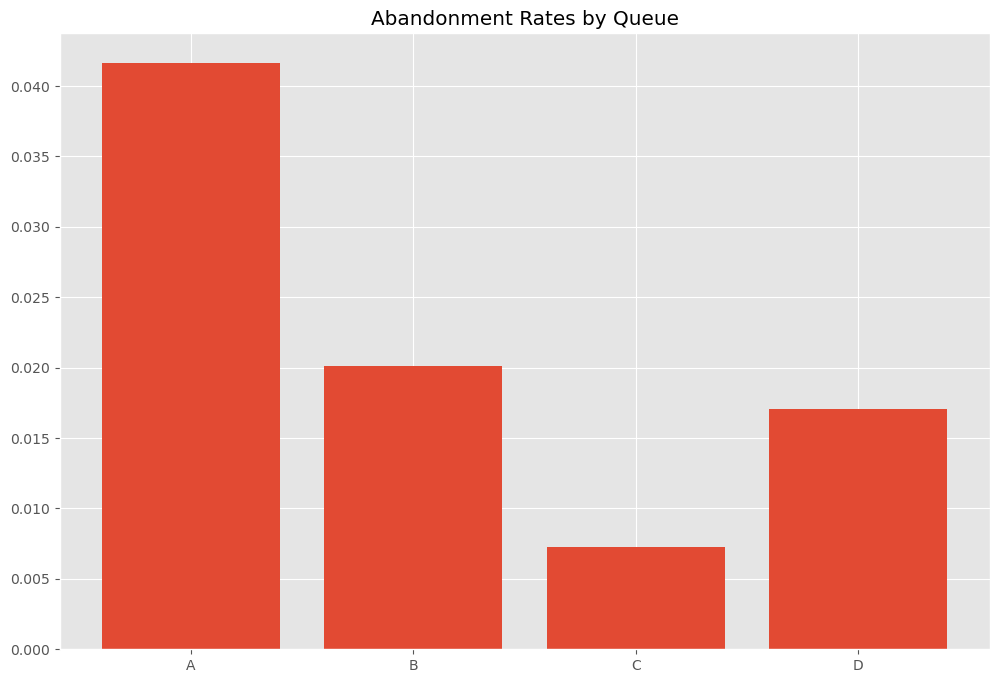

In [28]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
branchqueue = list(abandonment_rates.keys())  
rates = list(abandonment_rates.values())
x = np.array(branchqueue)
y = np.array(rates)
plt.title("Abandonment Rates by Queue")
plt.bar(x,y)
plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

We use seaborn scatter plot to display the average speed of answer for each rep in North Branch. It's used to show the outliers if any.

<Axes: xlabel='Rep ID', ylabel='Incoming Wait Time'>

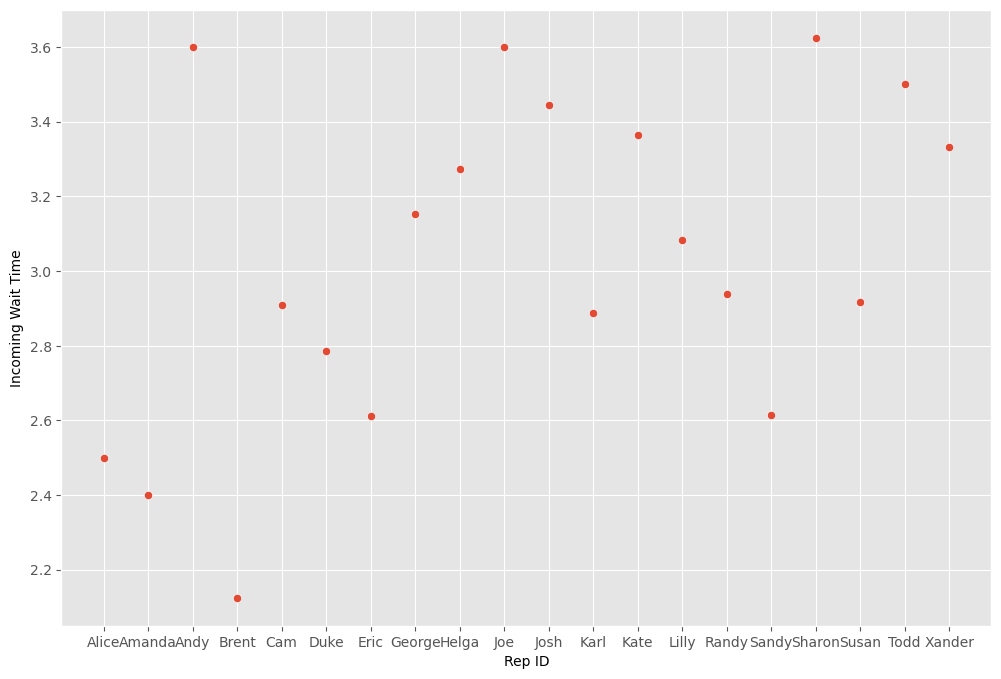

In [29]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = ndf[ndf["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table 

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
sns.scatterplot(data=north_plt, x="Rep ID", y="Incoming Wait Time")

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

We use seaborn barplot of show the number of outgoing and incming calls to better visualize the values by groups.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


Text(0, 0.5, 'purpose_counts')

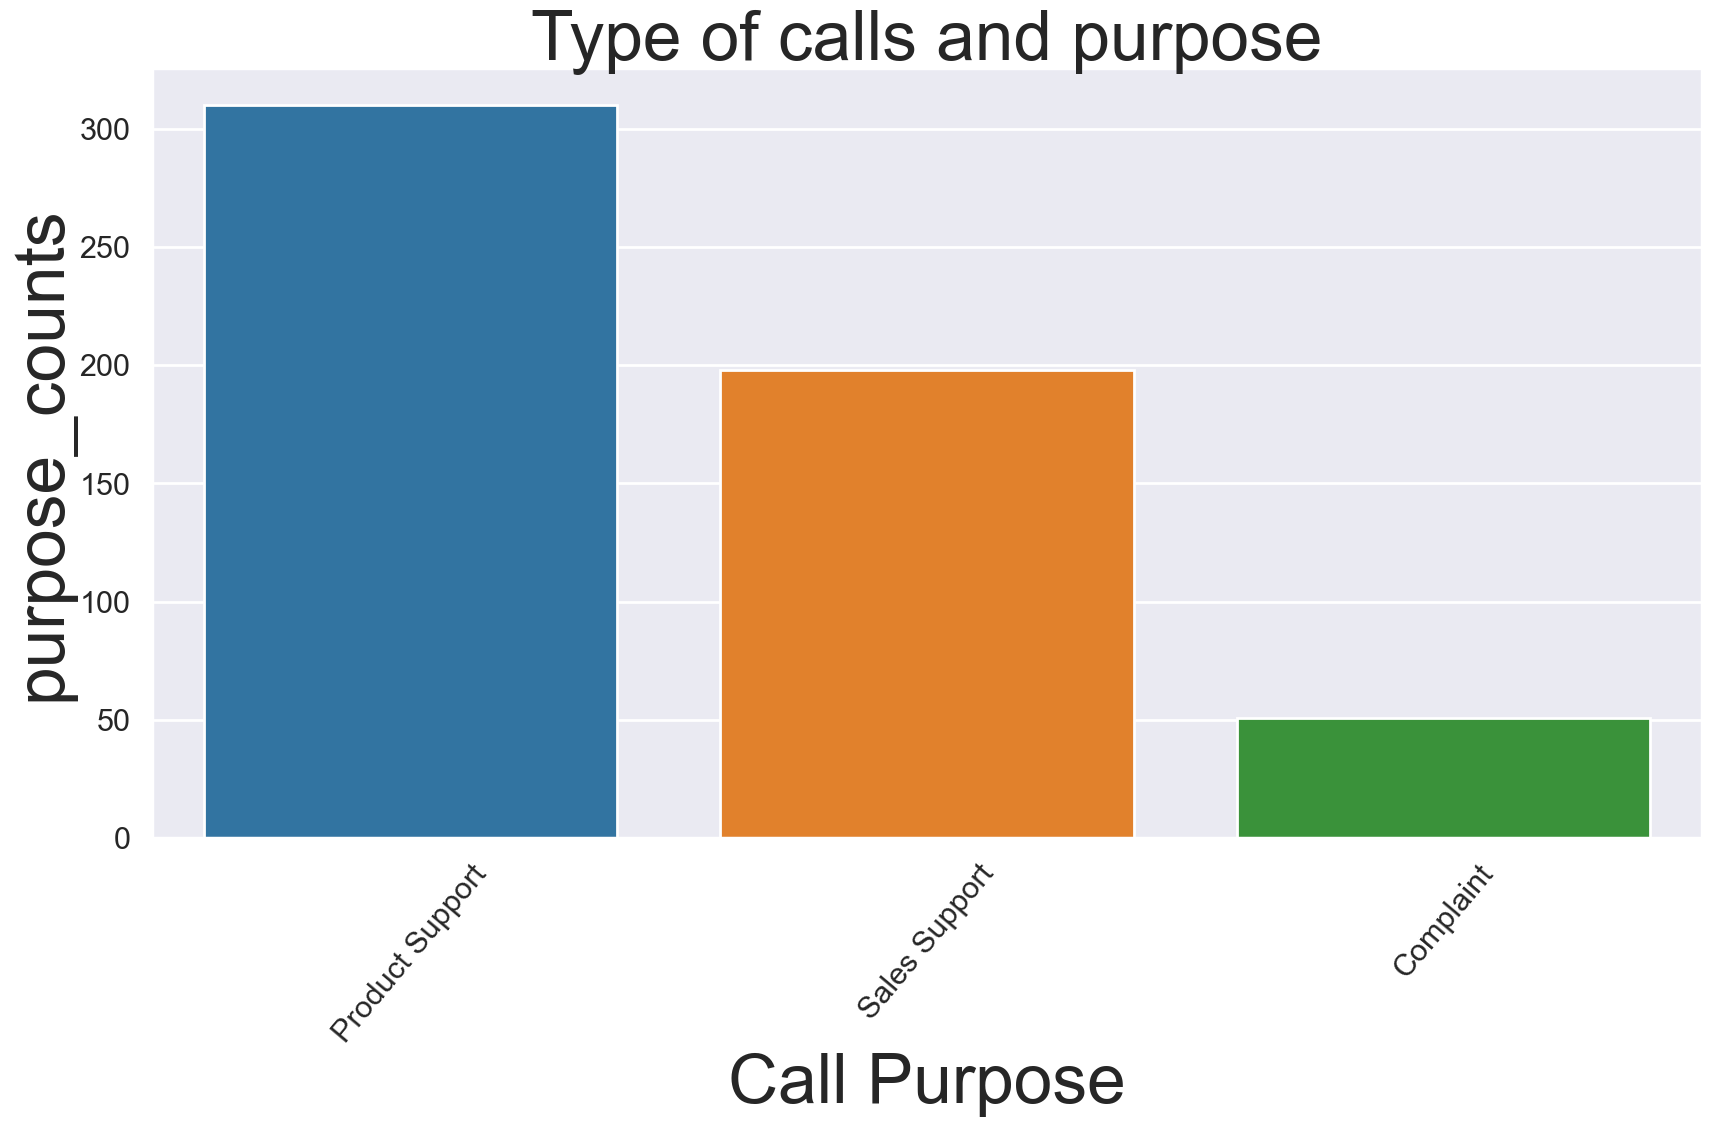

In [112]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

df['Call Purpose'].value_counts().head(10)

sns.set_context("poster")
most_books = df.groupby('Call Purpose')['Incoming or Outgoing'].count().reset_index().sort_values('Incoming or Outgoing', ascending=False).head(10).set_index('Call Purpose', )
plt.figure(figsize=(20,10))
ax = sns.barplot(x = most_books.index, y = most_books['Incoming or Outgoing'], palette='tab10', orient = 'v')
ax.tick_params(axis='x', rotation=50)
ax.set_title("Type of calls and purpose", size = 50)
ax.set_xlabel("Call Purpose", size = 50)
ax.set_ylabel('purpose_counts', size = 50)




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: I felt like the north branch wass operating more efficiently because the reps were taking more calls, and had a lower incoming wait time.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: I think the South branch needs more help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
That the data and information in this dataset looks good.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [31]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: